## MTH 9842
## HW1

### Group L: Yang Li, Zhirong Zhang, Tiangang Zhang, Jimmy Jusuf

In [1]:
import numpy as np
from scipy.optimize import least_squares,rosen, differential_evolution
import pandas as pd
from math import *
import matplotlib.pyplot as plt

### Problem 1

In [2]:
data=pd.read_csv('Assignment1_data.csv',header=None,names=['T','value'])

In [3]:
data

,T,value
0,1,1.0545
1,2,1.3095
2,3,1.4227
3,4,1.4830
4,5,1.4368
5,6,1.4489
6,7,1.3539
7,8,1.1982
8,9,1.1230
9,10,0.9866


Define function $g(x, T)=x_1+x_2\exp(x_3 T)+x_4\exp(x_5 T), x=(x_1,x_2,x_3,x_4,x_5) \in \mathbb{R}^5$

In [4]:
def g(x, T):
    '''
    input: x, of shape (5,); independent variables
           T, vector
    return a vector of len(T)
    the code relies on numpy broadcasting across vector T
    '''
    assert x.shape==(5,)
    result=x[0]+x[1]*np.exp(x[2]*T)+x[3]*np.exp(x[4]*T)
    assert result.shape==T.shape
    return result

In [5]:
# rosenbrock function, not used, for testing purpose
def fun_rosenbrock_2(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

In [6]:
# computes vector of residuals
def g_residuals(x, *args, **kwargs):
    # assert x.shape==(5,)
    T=data['T']
    v=data['value']
    resid=np.zeros(len(T))
    resid=g(x, T)-v
    return resid

In [7]:
# solve unconstrained non-linear least square problem using Levenberg-Marquardt algorithm

# use all zeros as initial guess of independent variables
x_ini=np.zeros(5)

res_1=least_squares(g_residuals, x_ini, method='lm')

In [8]:
# reason for algorithm termination
print("Success", res_1.success);
print(res_1.message)

Success True
`ftol` termination condition is satisfied.


In [9]:
# solutions found
res_1.x

array([ 7.18894871e+01, -1.95674736e+00, -3.32394891e-01, -6.92739390e+01,
        2.22777481e-03])

In [10]:
# value of the cost function at the solution
res_1.cost

0.0018950442194381049

In [11]:
# vector of residuals at the solution
res_1.fun

array([ 0.00316225, -0.00980889,  0.00644078, -0.00525024,  0.03148083,
       -0.03184068, -0.01810642,  0.0346807 , -0.00865713, -0.002101  ])

In [12]:
# number of function evaluations done
res_1.nfev

802

### Problem 2

In [13]:
def rosen_der(x):
    '''
    computes gradient of rosenbrock function
    input: x(2,)
    output: array of length 2 representing the gradient
    '''
    return np.array([2*(x[0]-1)-400*(x[1]-x[0]**2)*x[0],
                     200*(x[1]-x[0]**2)])

def rosenbrock(x):
    '''
    rosenbrock function
    input: x(2,)
    '''
    return (x[0]-1)**2+100*(x[1]-x[0]**2)**2

# keep stats during descent
l_x=[]  # list of x
l_cmin=[]  # list function values
l_resid=[]  # list of residuals
l_ba=[]  # list of learning rates used
l_der=[]  # list of gradients

# step size/learning rate to try
alpha=[0.001,0.002,0.003,0.004,0.005,0.1,0.5]

def rosenbrock_opt(x,alpha,tol1=1e-12,tol2=1e-6):
    '''
    implement gradient descent algorithm on rosenbrock function
    input: x(2,) initial guesses
           alpha() list of learning rates, the algorithm will choose one by means of a line search
    output: 
    '''
    it=0  # number of iteration
    #global l_x, l_cmin, l_resid, l_ba, l_der
    l_x.clear()
    l_cmin.clear()
    l_resid.clear()
    l_ba.clear()
    l_der.clear()
    while True:
        it+=1
        crosen=rosenbrock(x)
        der=rosen_der(x)
        # select alpha
        ba=alpha[0]
        cmin=rosenbrock(x-der*ba)
        for i in range(1,len(alpha)):
            val=rosenbrock(x-der*alpha[i])
            if val<cmin:
                ba=alpha[i]
                cmin=val
        # keep trails of the algorithm
        l_der.append(der)
        l_ba.append(ba)
        l_cmin.append(cmin)
        l_x.append(x)
        # update x estimates
        x=x-der*ba
        if abs(der).all()<tol1 and abs(cmin-crosen)<tol2:
        #if abs(cmin-crosen)<tol2:
            return x,cmin,'tol exit',it
        elif it>10000:
            return x,cmin,'iter exit',it

In [14]:
# gradient descent with initial guess (0,0)
rosenbrock_opt(np.array([0.,0.]),alpha,tol1=1,tol2=1e-12)

(array([1., 1.]), 3.1049022887626685e-26, 'tol exit', 2574)

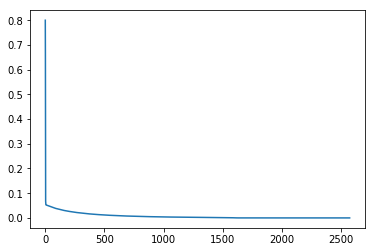

In [15]:
# plot function value during each iteration
obj=pd.Series(l_cmin)
obj.plot()

In [16]:
# check that the learning rates used are reasonable
np.histogram(l_ba,bins=alpha)

(array([ 156, 1696,  405,  108,   77,  132]),
 array([0.001, 0.002, 0.003, 0.004, 0.005, 0.1  , 0.5  ]))

In [17]:
# initial guess (1.2, 1.2)
rosenbrock_opt(np.array([1.2,1.2]),alpha,tol2=1e-8)

(array([1., 1.]), 2.889972697792612e-25, 'tol exit', 1144)

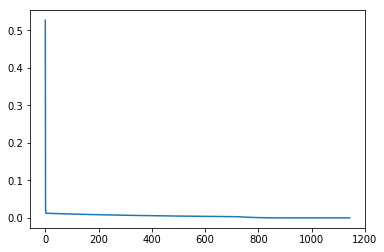

In [18]:
# plot function value during each iteration
obj=pd.Series(l_cmin)
obj.plot()

In [20]:
# run gradient descent with initial guess x,y vary from -3 to +3.75
xcov=[]
ycov=[]
xexp=[]
yexp=[]
for i in range(25):
    for j in range(25):
        x=-3+0.3*i
        y=-3+0.3*j
        array,funval,status,_=rosenbrock_opt(np.array([x,y]),alpha)
        if status=='tol exit':
            xcov.append(x)
            ycov.append(y)
        elif status=='iter exit':
            xexp.append(x)
            yexp.append(y)
            

/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarnin

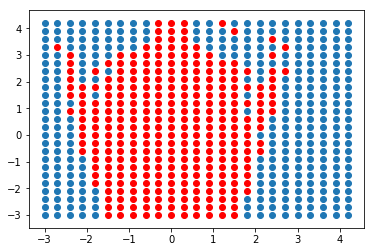

In [21]:
plt.scatter(xexp,yexp)
plt.scatter(xcov,ycov,facecolor='red')

Conclusion: gradient descent algorithm applied to Rosenbrock function generally suffers from slow convergence once it hits the valley. Finding the valley is trivial, but once inside the valley finding global minimum is very slow.

### Problem 3

In [22]:
def ackley(x):
    res=20+exp(1)-20*exp(-0.2*sqrt(0.5*(x[0]**2+x[1]**2)))-exp(0.5*(cos(2*pi*x[0])+cos(2*pi*x[1])))
    return res

In [23]:
bounds1 = [(-1,3)]*2

In [24]:
differential_evolution(rosenbrock,bounds=bounds1,strategy='rand1bin',popsize=10)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4583
     nit: 228
 success: True
       x: array([1., 1.])

In [25]:
bounds2 = [(-3,3)]*2

In [26]:
differential_evolution(ackley,bounds=bounds2,strategy='rand1bin')

     fun: -4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4833
     nit: 158
 success: True
       x: array([ 0.00000000e+00, -3.33066907e-16])

In [28]:
Flist=[0.1+0.2*i for i in range(10)]
CRlist=[0.1*i for i in range(1,10)]
#rosen success x
rsx=[]
rsy=[]
#rosen unsuccess x
rux=[]
ruy=[]
asx=[]
asy=[]
aux=[]
auy=[]
for F in Flist:
    for CR in CRlist:
        rres=differential_evolution(rosenbrock,bounds=bounds1,strategy='rand1bin',popsize=10,mutation=F,recombination=CR)
        ares=differential_evolution(ackley,bounds=bounds2,strategy='rand1bin',popsize=10,mutation=F,recombination=CR)
        if rres['success']:
            rsx.append(F)
            rsy.append(CR)
        else:
            rux.append(F)
            ruy.append(CR)
        if ares['success']:
            asx.append(F)
            asy.append(CR)
        else:
            aux.append(F)
            auy.append(CR)

Text(0,0.5,'CR')

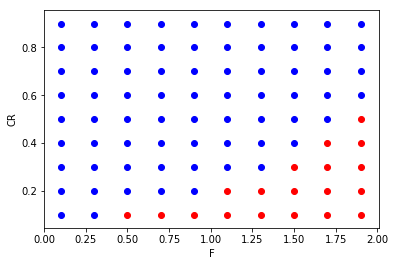

In [29]:
plt.scatter(rsx,rsy,c='b')
plt.scatter(rux,ruy,c='r')
plt.xlabel('F')
plt.ylabel('CR')

Text(0,0.5,'CR')

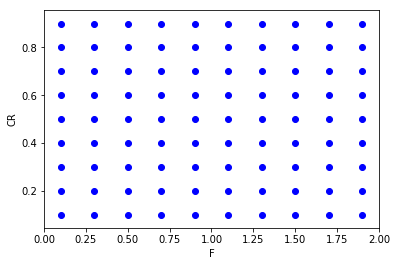

In [30]:
plt.scatter(asx,asy,c='b')
plt.scatter(aux,auy,c='r')
plt.xlabel('F')
plt.ylabel('CR')

In [31]:
#rosen success pop
rsp=[]
rup=[]
asp=[]
aup=[]
for n in range(4,22):
    rres=differential_evolution(rosenbrock,bounds=bounds1,strategy='rand1bin',popsize=n,mutation=0.5,recombination=0.1)
    ares=differential_evolution(ackley,bounds=bounds2,strategy='rand1bin',popsize=n,mutation=0.5,recombination=0.1)
    if rres['success']:
            rsp.append(n)
    else:
            rup.append(n)
    if ares['success']:
            asp.append(n)
    else:
            aup.append(n)

/Users/lina/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:555: RuntimeWarning: divide by zero encountered in double_scalars
  np.abs(np.mean(self.population_energies) + _MACHEPS))


In [32]:
rsp

[4, 5, 10]

In [33]:
asp

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]